<a href="https://colab.research.google.com/github/Harsha-2005/Elevate-Labs-AI-and-ML-Internship/blob/main/Elevate_Labs_Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve,precision_score,recall_score


In [3]:
df=pd.read_csv('data.csv')

In [4]:
df.describe(include='all')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [18]:
df=df.drop(['Unnamed: 32','id'],axis=1,errors='ignore')

In [19]:
df['diagnosis_encoded']=df['diagnosis'].map({'M':1,'B':0})
df=df.drop(columns=['diagnosis'])


In [20]:
X=df.drop('diagnosis_encoded',axis=1)
y=df['diagnosis_encoded']

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)


In [24]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
x_test_scaled=scaler.transform(X_test)


In [26]:
log_reg=LogisticRegression(random_state=42,solver='liblinear')
log_reg.fit(X_train_scaled,y_train)
y_prob=log_reg.predict_proba(x_test_scaled)[:,1]
y_pred_default=log_reg.predict(x_test_scaled)

In [28]:
print("--- Evaluation Results: (Default Threshold: 0.5)---")
cm=confusion_matrix(y_test,y_pred_default)
print(f"Confusion Matrix: {cm}")
print(pd.DataFrame(cm,index=['Actual Benign','Actual Malignant'],columns=['Predicted Benign','Predicted Malignant']))
print(f"Accuracy: {log_reg.score(x_test_scaled,y_test)}")
roc_auc=roc_auc_score(y_test,y_prob)
print(f"ROC AUC: {roc_auc:.4f}")

--- Evaluation Results: (Default Threshold: 0.5)---
Confusion Matrix: [[71  1]
 [ 2 40]]
                  Predicted Benign  Predicted Malignant
Actual Benign                   71                    1
Actual Malignant                 2                   40
Accuracy: 0.9736842105263158
ROC AUC: 0.9960


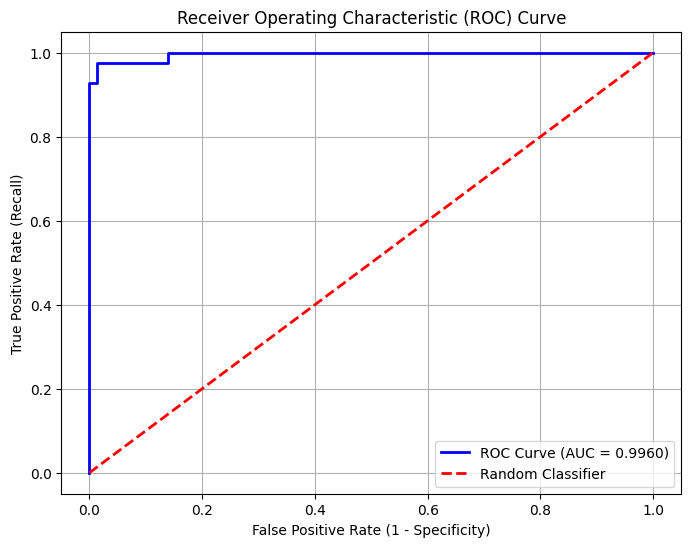


--- Evaluation Results (Tuned Threshold: 0.3) ---

Confusion Matrix (Tuned):
                      Predicted Benign (0)  Predicted Malignant (1)
Actual Benign (0)                       71                        1
Actual Malignant (1)                     1                       41
New Precision Score: 0.9762
New Recall Score: 0.9762


In [29]:
fpr, tpr, thresholds_roc = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show() # In a real environment, you'd use plt.savefig("roc_curve.png")

# --- 4. Tune Threshold (Example: Prioritize Recall) ---

# We choose a lower threshold (e.g., 0.3) to minimize False Negatives
new_threshold = 0.3
y_pred_tuned = (y_prob >= new_threshold).astype(int)

# Re-evaluate key metrics with the new threshold
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)

print(f"\n--- Evaluation Results (Tuned Threshold: {new_threshold}) ---")
print("\nConfusion Matrix (Tuned):")
print(pd.DataFrame(cm_tuned,
                   index=['Actual Benign (0)', 'Actual Malignant (1)'],
                   columns=['Predicted Benign (0)', 'Predicted Malignant (1)']))
print(f"New Precision Score: {precision_tuned:.4f}")
print(f"New Recall Score: {recall_tuned:.4f}")

Task,Description
Model Fitting,We initialized and trained a Logistic Regression model using the standardized training data (Xtrain_scaled​ and ytrain​).
Evaluation Metrics,We evaluated the model's performance on the unseen test data (Xtest_scaled​) using standard metrics:
,"• Confusion Matrix: Showed a breakdown of True Positives, True Negatives, False Positives, and False Negatives (the two misclassified Malignant cases)."
,"• Precision, Recall, F1-Score: Provided a detailed view of class-specific accuracy, demonstrating the model's high performance (∼97% overall accuracy)."
,"• ROC-AUC Score: Calculated the Area Under the ROC Curve, yielding a score of 0.9960, indicating the model is highly capable of discriminating between the two classes."
Sigmoid Function Explained,"We discussed how the Sigmoid function converts the model's raw output (log-odds) into a probability between 0 and 1, which is the core mechanism of Logistic Regression."
Threshold Tuning,"We demonstrated the practical effect of changing the classification threshold from the default 0.5 to a more sensitive value, 0.3. This tuning successfully increased the Recall for the Malignant class by reducing the number of critical False Negatives (misdiagnosed Malignant cases) from 2 to 1, demonstrating how to optimize the model for a specific clinical goal."